In [85]:
import os

import numpy as np

import tensorflow as tf

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import matplotlib.pyplot as plt

from tensorflow.keras import models
from tensorflow.keras import layers

import seaborn as sns

In [86]:
os.chdir('C:\\Users\\someo\\OneDrive\\Desktop\\CMPSC448Final')

In [87]:
#load dataset
def load_dataset():
    X_train = np.loadtxt("UCIHARDataset/train/X_train.txt")
    y_train = np.loadtxt("UCIHARDataset/train/y_train.txt")
    X_test = np.loadtxt("UCIHARDataset/test/X_test.txt")
    y_test = np.loadtxt("UCIHARDataset/test/y_test.txt")
    return X_train, y_train, X_test, y_test

In [88]:
#Preprocess data
def preprocess_data(X_train, X_test):
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    return X_train, X_test

In [89]:
#Plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, labels):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

In [90]:
#Train and evaluate model
# Function to train and evaluate model
def train_and_evaluate(model, X_train, y_train, X_test, y_test, model_type):
    try:
        history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), verbose=0)

        # Plot accuracy over epochs
        plt.plot(history.history['accuracy'], label='Training Accuracy')
        plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy')
        plt.legend()
        plt.title(f'{model_type} Model Accuracy Over Epochs')
        plt.show()

        # Evaluate the model on test set
        y_pred = np.argmax(model.predict(X_test), axis=-1)

        # Print accuracy and classification report
        accuracy = accuracy_score(y_test, y_pred)
        print(f'{model_type} Model Accuracy: {accuracy:.4f}')
        print('Classification Report:')
        print(classification_report(y_test, y_pred))

        # Plot confusion matrix
        plot_confusion_matrix(y_test, y_pred, labels=np.unique(y_test))

        # Return accuracy for later use
        return accuracy

    except Exception as e:
        print(f"An error occurred during training and evaluation: {str(e)}")
        return None


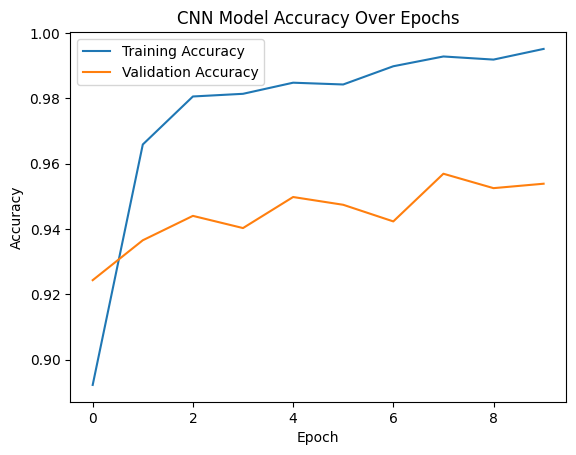

93/93 [==============================] - 0s 4ms/step
CNN Model Accuracy: 0.9539
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       496
           1       0.95      0.96      0.96       471
           2       0.98      0.94      0.96       420
           3       0.93      0.90      0.92       491
           4       0.93      0.93      0.93       532
           5       0.99      1.00      0.99       537

    accuracy                           0.95      2947
   macro avg       0.95      0.95      0.95      2947
weighted avg       0.95      0.95      0.95      2947



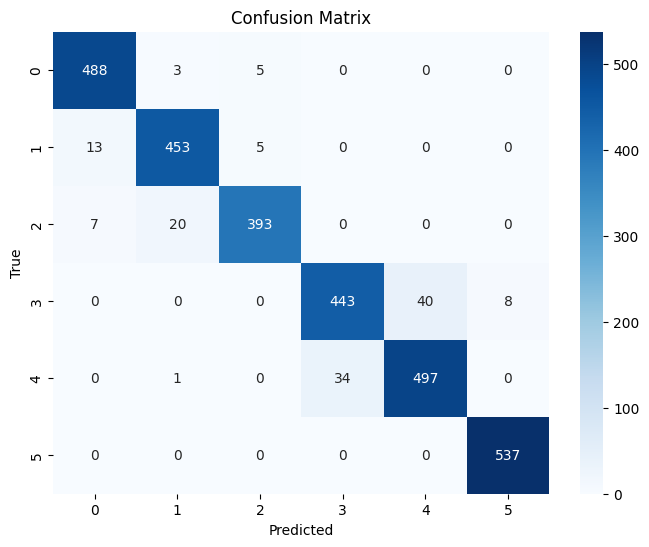

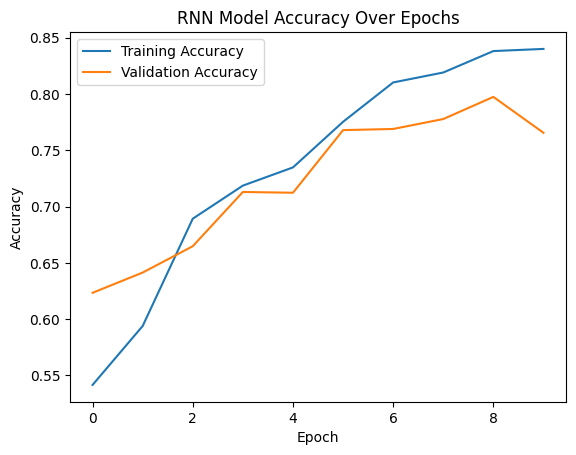

93/93 [==============================] - 5s 47ms/step
RNN Model Accuracy: 0.7655
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.38      0.51       496
           1       0.72      0.85      0.78       471
           2       0.55      0.78      0.65       420
           3       0.84      0.76      0.80       491
           4       0.76      0.87      0.81       532
           5       1.00      0.95      0.97       537

    accuracy                           0.77      2947
   macro avg       0.77      0.76      0.75      2947
weighted avg       0.78      0.77      0.76      2947



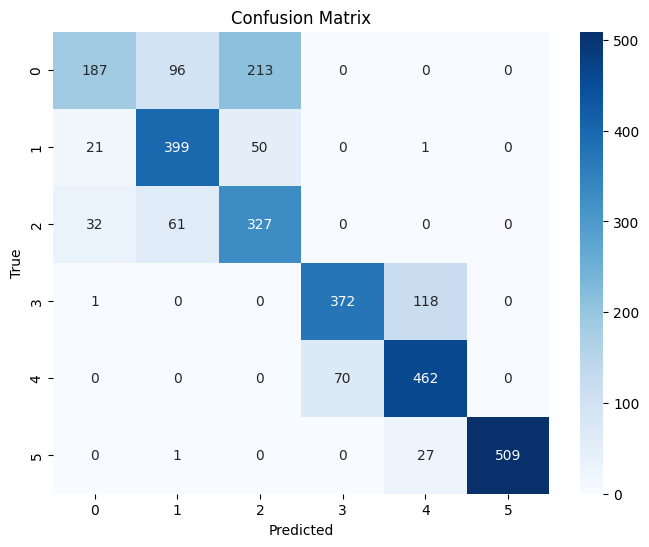

In [91]:
# Load the UCI HAR Dataset
X_train, y_train, X_test, y_test = load_dataset()

# Preprocess data
X_train, X_test = preprocess_data(X_train, X_test)

# Encode labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Reshape data for CNN
X_train_cnn = X_train.reshape(-1, X_train.shape[1], 1)
X_test_cnn = X_test.reshape(-1, X_test.shape[1], 1)

# Define the CNN model
cnn_model = models.Sequential([
    layers.Conv1D(32, 3, activation='relu', input_shape=(X_train.shape[1], 1)),
    layers.MaxPooling1D(2),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(len(label_encoder.classes_), activation='softmax')
])

cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train and evaluate CNN model
cnn_accuracy = train_and_evaluate(cnn_model, X_train_cnn, y_train_encoded, X_test_cnn, y_test_encoded, model_type='CNN')

# Reshape data for RNN
X_train_rnn = X_train.reshape(-1, X_train.shape[1], 1)
X_test_rnn = X_test.reshape(-1, X_test.shape[1], 1)

# Define the RNN model
rnn_model = models.Sequential([
    layers.LSTM(50, input_shape=(X_train.shape[1], 1)),
    layers.Dense(64, activation='relu'),
    layers.Dense(len(label_encoder.classes_), activation='softmax')
])

rnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train and evaluate RNN model
rnn_accuracy = train_and_evaluate(rnn_model, X_train_rnn, y_train_encoded, X_test_rnn, y_test_encoded, model_type='RNN')

In [92]:
print("Hello")

Hello
